# SVM classifier for Wine dataset


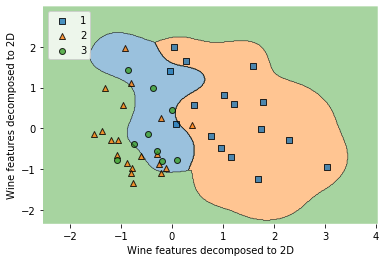

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR

# import wine data set
wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
#seperate into training and testing data
X = wine.drop('Class label', axis=1)
Y = wine['Class label']
#normalize the X data
#X = preprocessing.normalize(X, norm='l2', axis=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, random_state=0)


# decided to make two machines. The first is the three variables
# with the greatest identifying characteristics. The color gradient
# describes the class divisions. Actually didn't end up having enough time to 
# complete this so the regular 2d SVM is below (not in comments)
#########################################################
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc_t = StandardScaler()
# S2 = sc.fit_transform(X_train)
# t2 = sc_t.fit_transform(X_train)

# pca = PCA(n_components = 2)
# X_train1 = pca.fit_transform(X_train)
# X_test1 = pca.fit_transform(X_test)

# pca = PCA(n_components = 1)
# P_train1 = pca.fit_transform(X_train)
# P_test1 = pca.fit_transform(X_test)


# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# P_train_std = sc.transform(P_train)
# P_test_std = sc.transform(P_test)

# X_combined_std = np.vstack((X_train_std, X_test_std))
# y_combined = np.hstack((y_train, y_test))

# P_combined_std = np.vstack((P_train_std, P_test_std))
# Q_combined = np.hstack((y_train, y_test))

# svmX = SVC(kernel='rbf', random_state=0, gamma=3, C=1.0)
# svmX.fit(X_train_std, y_train)

# svmP = SVC(kernel='rbf', random_state=0, gamma=3, C=1.0)
# svmP.fit(X_train_std, y_train)



# fig = plt.figure(figsize=(8, 6))
# t = fig.suptitle('PCA DIM 1', 'PCA DIM 2', 'PCA DIM 3', fontsize=14)
# ax = fig.add_subplot(111, projection='3d')


#####################################################
# Second machine compressed to 2 dimensions
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)
# standardize the features
#print(X_train2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train2)
X_train_std = sc.transform(X_train2)
X_test_std = sc.transform(X_test2)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf', random_state=0, gamma=3, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std[105:150, :], y_combined[105:150], clf=svm)
plt.xlabel('Wine features decomposed to 2D')
plt.ylabel('Wine features decomposed to 2D')
plt.legend(loc='upper left')
plt.show()